In [1]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np
from nptdms import TdmsFile
import os
from lmfit import create_params, minimize
%matplotlib inline
sns.set(style="whitegrid")
def import_gamry(file):
    data = []
    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\t')
        for _ in range(65):
            next(csv_file)
        for line in csv_reader:
            f_list = []
            for n in line:
                try:
                    f_list.append(float(n))
                except:
                    continue
            if len(f_list) == 9:
                data.append(f_list)
    return data
 

ModuleNotFoundError: No module named 'lmfit'

C:\Users\bashc\AppData\Local\Temp\ipykernel_38672\2718006152.py:47: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,100])


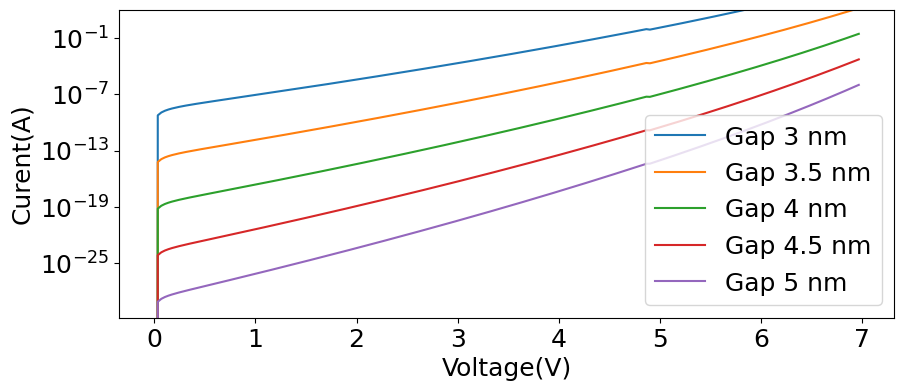

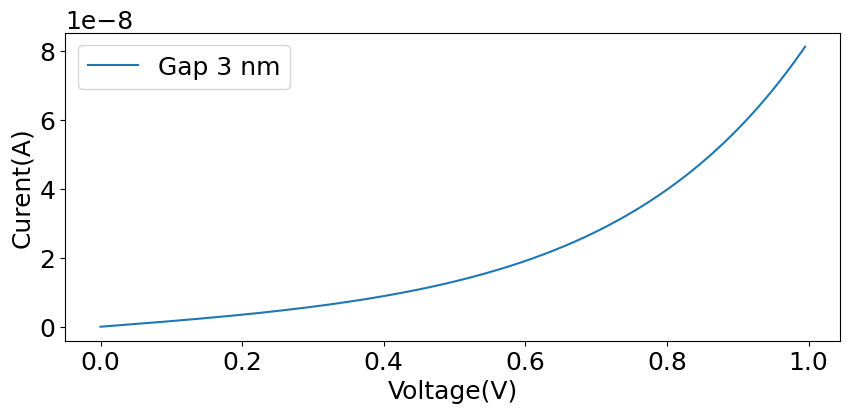

In [4]:


def c_s2(v,S,phi0,K):
    return np.where(v<phi0, S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0,S-6/K/phi0 )
    #if (v<phi0):
    #    return S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0
    #else:
    #    return S-6/K/phi0
def c_s1(v,S,phi0,K):
    return 6/K/phi0

def c_phiL(v,S,phi0,K):
    s1=c_s1(v,S,phi0,K)
    s2=c_s2(v,S,phi0,K)
    ds=s2-s1
    return ds,phi0-(v/2/S)*(s1+s2)-(5.75/K/ds)*np.log(s2/s1*(S-s1)/(S-s2))
    
def I(v,S,phi0,K,R,I0):
    ds,phiL=c_phiL(v,S,phi0,K)
    return I0+R*v+ 1e6/4e-12*(6.2e10/ds/ds)*(phiL*np.exp(-1.025*ds*phiL**.5)-(phiL+v)*np.exp(-1.025*ds*(phiL+v)**.5) )

S0 =3.9
phi00= 4.9
K0=9
R0=0
I0=0


v2 =np.arange(0,7,7/200)


plt.rc('font', size=18) #controls default text size
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend

plt.figure(figsize=(10,4))

plt.semilogy(v2, I(v2, 30 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3 nm")
plt.semilogy(v2, I(v2, 35 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3.5 nm")
plt.plot(v2, I(v2, 40 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 4 nm")
plt.plot(v2, I(v2, 45 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 4.5 nm")
plt.plot(v2, I(v2, 50 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 5 nm")
#plt.plot(v2, I(v2, 60 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 6 nm")
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(A)")
plt.ylim([0,100])
plt.legend()
plt.show()


plt.figure(figsize=(10,4))
v2 =np.arange(0,1,1/200)
plt.plot(v2, I(v2, 30 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3 nm")
 
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(A)")
 
plt.legend()
plt.show()

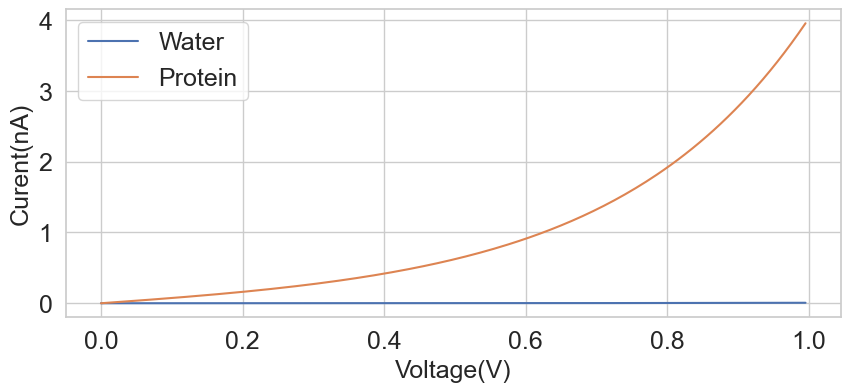

In [17]:
plt.figure(figsize=(10,4))
v2 =np.arange(0,1,1/200)
plt.plot(v2, I(v2, 28,phi00 ,9,R0,I0 )*1e-3, label="Water")
plt.plot(v2, I(v2, 28 ,phi00 ,2,R0,I0 )*1e-3, label="Protein")
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(nA)")
 
plt.legend()
plt.show()

In [11]:



def c_s2(v,S,phi0,K):
    return np.where(v<phi0, S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0,S-6/K/phi0 )
    #if (v<phi0):
    #    return S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0
    #else:
    #    return S-6/K/phi0
def c_s1(v,S,phi0,K):
    return 6/K/phi0

def c_phiL(v,S,phi0,K):
    s1=c_s1(v,S,phi0,K)
    s2=c_s2(v,S,phi0,K)
    ds=s2-s1
    return ds,phi0-(v/2/S)*(s1+s2)-(5.75/K/ds)*np.log(s2/s1*(S-s1)/(S-s2))
    
def I(v,S,phi0,K,R,I0):
    ds,phiL=c_phiL(v,S,phi0,K)
    return I0+R*v+ 1e6/4e-12*(6.2e10/ds/ds)*(phiL*np.exp(-1.025*ds*phiL**.5)-(phiL+v)*np.exp(-1.025*ds*(phiL+v)**.5) )




S0 =3.9
phi00= 4.9
K0=11
R0=0
I0=0


df["v2"] =np.arange(0,7,7/200)
df["model"] = I(df["v2"], S0 ,phi00 ,K0,R0,I0 )


plt.rc('font', size=18) #controls default text size
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend

plt.figure(figsize=(10,4))

plt.semilogy(df["v2"], I(df["v2"], 30 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3 nm")
plt.plot(df["v2"], I(df["v2"], 40 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 4 nm")
plt.plot(df["v2"], I(df["v2"], 50 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 5 nm")
plt.plot(df["v2"], I(df["v2"], 60 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 6 nm")
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(pA)")
plt.ylim([0,100])
plt.legend()
plt.show()


NameError: name 'df' is not defined

In [ ]:
plt.rc('font', size=18) #controls default text size
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend

plt.figure(figsize=(10,4))

plt.semilogy(df["v2"], I(df["v2"], 30 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3 nm")
plt.plot(df["v2"], I(df["v2"], 40 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 4 nm")
plt.plot(df["v2"], I(df["v2"], 50 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 5 nm")
plt.plot(df["v2"], I(df["v2"], 60 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 6 nm")
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(pA)")
plt.ylim([0,100])
plt.legend()
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
print(df.loc[:,["v2","model"]])

In [ ]:
popt, pcov = curve_fit(
    f=I,       # model function
    xdata=np.array(x),   # x data
    ydata=np.array(y),   # y data
    p0=(S0 ,phi00 ,K0,R0,I0)      # initial value of the parameters
)
ax = df.plot(
    x="Voltage", y="Current",
    kind="line", title="IV", marker=".")

df["model"] = I(np.array(x),popt[0] ,popt[1] ,popt[2],popt[3],popt[4] )
ax = df.plot(
    x="Voltage", y="model",
    kind="line", ax=ax, linewidth=1
)
print(popt )

In [12]:

def I(v,S,phi0,K,R): #returns amps/m^2
    s1=6/K/phi0

    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))

    return 1e-30*R*v+1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )

 
def residual(pars, x, data=None):
    model =I(x,pars['S'] ,pars['phi0'] ,pars['K'], pars['R'])*1e-4*1e6*1e6*1e9 *1e3
    model[(np.isnan(model))]=0
    if data is None:
        return model
    return model - data




46.25533759773758 6.144257048180569 2.795491526760294 0.09999899000298063
99.99989480368271 1.523275907322587 1.0000000054235847 0.0997938181498619
99.99991896544975 1.483697318432654 1.0000000027315923 0.09999652421470506
40.934166838449684 6.999999779810281 1.6058754032506952 0.012864261209669376
41.33466126126435 6.950582172588407 1.4779946515621023 0.08642218566687708
37.9657909674479 6.894640060031991 6.3794416297703735 0.09336983779845794
99.99990317872685 1.465159955435675 1.0000000005870227 0.0968612911891747
39.76105919874938 6.989618875532791 2.360476066101451 0.006633716524554601
54.0 4.5 2.000000000000001 0.1
38.22608672440661 6.996241815828307 3.0124038817721113 0.010675544705706325
57.0 4.5 2.000000000000001 0.1
45.0749566291595 6.424586002671471 9.770725342751309 0.09838566053334478
46.89487322893735 6.793997271213841 3.4475909643279374 0.09999680416941349
58.99999999999999 4.5 2.000000000000001 0.1
99.99988809355962 1.5210007985832623 1.0000000022276507 8.14842406319793

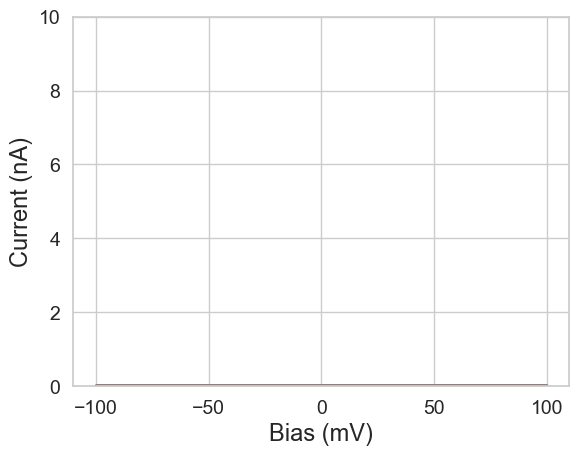

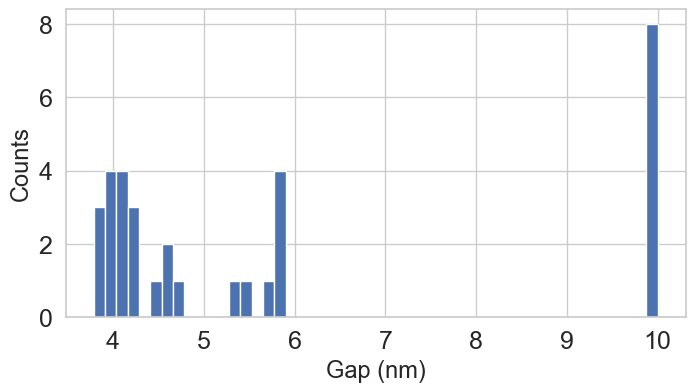

In [28]:
dataFolder = [r'D:\Downloads\IVs post dep\P002 C5',r'D:\Downloads\IVs post dep\P002 D4',r'D:\Downloads\IVs post dep\P002 D5']

gaps = []
for folder in dataFolder:
    fileList=  glob.glob(folder + "\\*.dta", recursive=False)
    for file in fileList:
        _, _, v, i, _, _, _, _, _ = zip(*import_gamry(file))
        
        bbias=np.array(v)
        cCurrent=np.array(i)
        cCurrent-=np.min(cCurrent)
        bK=1
        area=1
        fit_params = create_params(S=dict(value=np.random.randint(20,60), max=100, min=10),
                                            phi0=dict(value=4.5, max=7, min=.0003),
                                            K=dict(value=2, max=80, min=1),
                                            R=dict(value=.1, max=.1, min=0),
                                            area = dict(value = area, max=area*1.05, min= .1e-12)
                                            )

        out = minimize(residual, fit_params, args=(bbias*bK  ,), kws={'data':  cCurrent  } )
        
        plt.plot(bbias*1000,  (np.abs(cCurrent)))
        #plt.plot(bbias*bK*1000,   (np.abs(residual(fit_params, bbias*bK ))))
        plt.plot(bbias*1000,   (np.abs(residual(out.params, bbias*bK ))))
        print(out.params['S'].value, out.params['phi0'].value, out.params['K'].value, out.params['R'].value)
        gaps .append(out.params['S'].value)
plt.xlabel("Bias (mV)",fontsize = 17)
plt.ylabel("Current (nA)",fontsize = 17)

plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylim([0,10])
plt.show()

plt.figure(figsize=(8,4))
plt.hist(np.array(gaps)/10.0, bins=50)
plt.xlabel("Gap (nm)",fontsize = 17)
plt.ylabel("Counts",fontsize = 17)
plt.show()

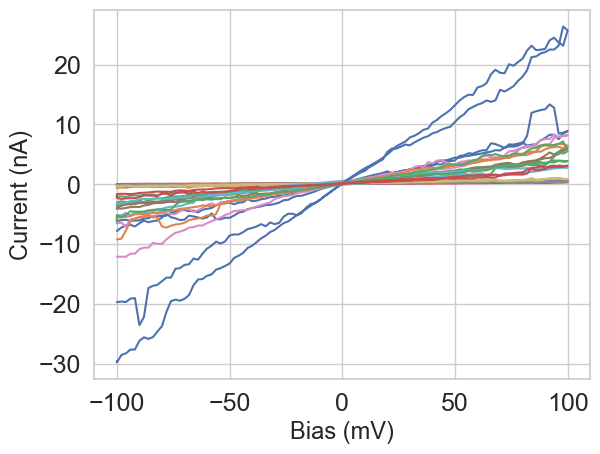

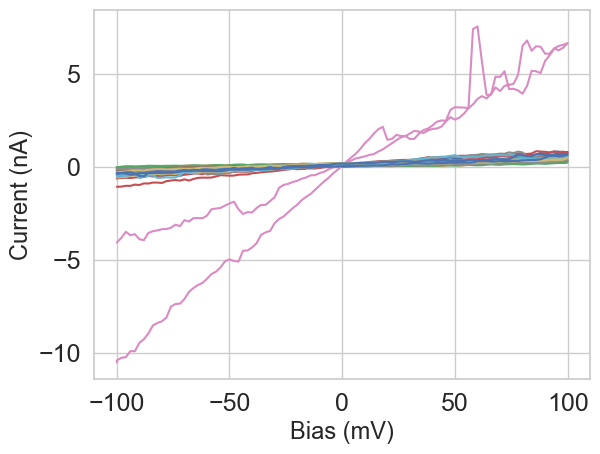

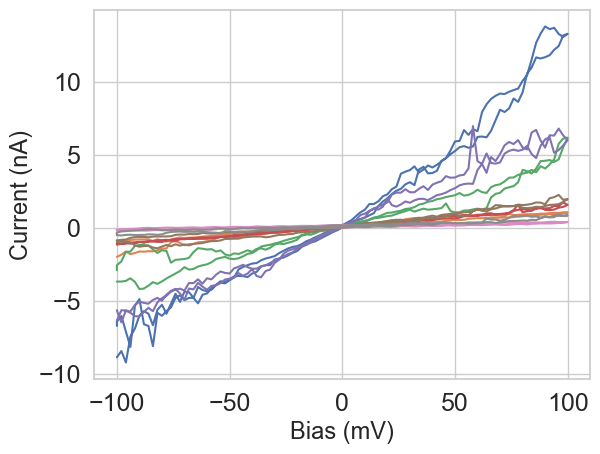

In [26]:
dataFolder = [r'D:\Downloads\IVs post dep\P002 C5',r'D:\Downloads\IVs post dep\P002 D4',r'D:\Downloads\IVs post dep\P002 D5']
for folder in dataFolder:
    fileList=  glob.glob(folder + "\\*.dta", recursive=False)
    for file in fileList:
        _, _, v, i, _, _, _, _, _ = zip(*import_gamry(file))
        plt.plot(np.array(v)*1000,np.array(i)*1e9)
    plt.xlabel("Bias (mV)",fontsize = 17)
    plt.ylabel("Current (nA)",fontsize = 17)
    plt.show()